<a href="https://colab.research.google.com/github/CandyCheng-git/AI-ML-EDA-Assessment-2025-04/blob/main/TECH3300_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Basic information
------------
on Week 4 - 8 April 2025

@authors:
Group 4
- 1844721 - Lok Tung Cheng
- 1832217 - Rachel Satomi Inoue
- 1833304 - Muhammad Adnan Arshad
- 1834494 - Ngoc Bao Trinh Tran
- 1827424 - Pradip Dhakal



## A.1. Datasets Description
------------


Welcome to the captivating realm of YouTube stardom, where this meticulously curated dataset unveils the statistics of the most subscribed YouTube channels. A collection of YouTube giants, this dataset offers a perfect avenue to analyze and gain valuable insights from the luminaries of the platform. With comprehensive details on top creators' subscriber counts, video views, upload frequency, country of origin, earnings, and more, this treasure trove of information is a must-explore for aspiring content creators, data enthusiasts, and anyone intrigued by the ever-evolving online content landscape. Immerse yourself in the world of YouTube success and unlock a wealth of knowledge with this extraordinary dataset.





## A.2. Problem Overview
------------

**Business Goal**:  
_Analyze what factors influence YouTube channel success in terms of subscriber growth and revenue potential._

We aim to extract meaningful business insights that could help content creators, agencies, or advertisers understand how certain attributes (e.g., category, uploads, country, channel type) affect YouTube performance.

### Sub-questions
------------
1. **Which content categories generate the highest yearly earnings?**
2. **How do upload counts relate to subscriber growth in the last 30 days?**
3. **Do countries with higher education levels or urbanization have more successful YouTubers?**
4. **Are individual creators growing faster than brand channels?**
5. **Do older YouTube channels perform better than newer ones?**


In [1]:
# General Libraries
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')



# B. Loading data

In [2]:
# Initialize
df_orign = None

In [3]:
import chardet

# Define the file path
FILE_PATH = "/content/data_set_1.csv"


with open(FILE_PATH, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Read the CSV file into the original DataFrame
df_orign = pd.read_csv(FILE_PATH, encoding=encoding)

# Print confirmation message
print("\n* Dataset loaded successfully!\n")


* Dataset loaded successfully!



## B.1. Display initial dataset information
### Key Features from the dataset:

- rank: Position of the YouTube channel based on the number of subscribers
- Youtuber: Name of the YouTube channel
- subscribers: Number of subscribers to the channel
- video views: Total views across all videos on the channel
- category: Category or niche of the channel
- Title: Title of the YouTube channel
- uploads: Total number of videos uploaded on the channel
- Country: Country where the YouTube channel originates
- Abbreviation: Abbreviation of the country
- channel_type: Type of the YouTube channel (e.g., individual, brand)
- video_views_rank: Ranking of the channel based on total video views
- country_rank: Ranking of the channel based on the number of subscribers within its country
- channel_type_rank: Ranking of the channel based on its type (individual or brand)
- video_views_for_the_last_30_days: Total video views in the last 30 days
- lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
- highest_monthly_earnings: Highest estimated monthly earnings from the channel
- lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
- highest_yearly_earnings: Highest estimated yearly earnings from the channel
- subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
- created_year: Year when the YouTube channel was created
- created_month: Month when the YouTube channel was created
- created_date: Exact date of the YouTube channel's creation
- Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
- Population: Total population of the country
- Unemployment rate: Unemployment rate in the country
- Urban_population: Percentage of the population living in urban areas
- Latitude: Latitude coordinate of the country's location
- Longitude: Longitude coordinate of the country's location




In [4]:
df_orign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

# C. Feature Engineering



## C.1. For missing value

In [5]:
# Initialize the DataFrames to None (optional, for clarity)
missing_data = None
missing_percentage = None
missing_df = None
missing_df_filtered = None
columns_of_included_missing = None

not_missing_count = None

# Define custom missing value tokens
custom_missing_values = ['nan', 'POA', '-', '- / -', '']

# Avoid division errors and handle missing values
df_orign_filtered = df_orign.copy()

### C.1.1. Filter the DataFrame which is missing

In [6]:
# Replace all custom tokens with np.nan (only for object/string columns)
df_orign_filtered = df_orign_filtered.replace(custom_missing_values, np.nan)

# Function to count custom missing values in a column
def count_custom_missing(col):
    return col.isnull().sum() + col.isin(custom_missing_values).sum()

# Apply the function to each column
missing_data = df_orign.apply(count_custom_missing)


not_missing_count = len(df_orign) - missing_data


Missing Data Summary (custom missing tokens included)

In [7]:
# Display the number of missing values in each column
print("Missing Data Summary (custom missing tokens included):")
print(missing_data)

Missing Data Summary (custom missing tokens included):
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
creat

### C.1.2. Display % of Missing value on each columns

In [8]:
# Calculate the percentage of missing values for each column
missing_percentage = (missing_data / len(df_orign)) * 100

# Filter columns with missing values only and sort them
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)


# Convert to DataFrame for better visualization
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Column', 'Missing Percentage']

# Sort the DataFrame by Missing Percentage in descending order
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)


Print the ranked Missing Percentage

In [9]:
# Filter to include only columns with missing percentage > 0
missing_df_filtered = missing_df[missing_df['Missing Percentage'] > 0]

# Display the filtered DataFrame
print("\n* Columns with Missing Percentage > 0:")
print(missing_df_filtered)



* Columns with Missing Percentage > 0:
                                     Column  Missing Percentage
0              subscribers_for_last_30_days           33.869347
1                          Urban_population           12.361809
2                         Unemployment rate           12.361809
3                                Population           12.361809
4                                 Longitude           12.361809
5                                  Latitude           12.361809
6   Gross tertiary education enrollment (%)           12.361809
7                                   Country           12.261307
8                              Abbreviation           12.261307
9                              country_rank           11.658291
10         video_views_for_the_last_30_days            5.628141
11                                 category            4.623116
12                        channel_type_rank            3.316583
13                             channel_type            3.015075


Display the column names with total count on Missing Percentage

In [10]:
# Get the columns
columns_of_included_missing = missing_df_filtered['Column'].tolist()

# Display the column names with total count on Missing Percentage
print("\n* Number of columns with missing values:")
print(len(missing_df_filtered))




* Number of columns with missing values:
18


In [11]:
print("\n* Print the column name on Missing Percentage:\n")
columns_of_included_missing


* Print the column name on Missing Percentage:



['subscribers_for_last_30_days',
 'Urban_population',
 'Unemployment rate',
 'Population',
 'Longitude',
 'Latitude',
 'Gross tertiary education enrollment (%)',
 'Country',
 'Abbreviation',
 'country_rank',
 'video_views_for_the_last_30_days',
 'category',
 'channel_type_rank',
 'channel_type',
 'created_month',
 'created_year',
 'created_date',
 'video_views_rank']

### C.1.3. [Visualization] Percentage of data missing from each column


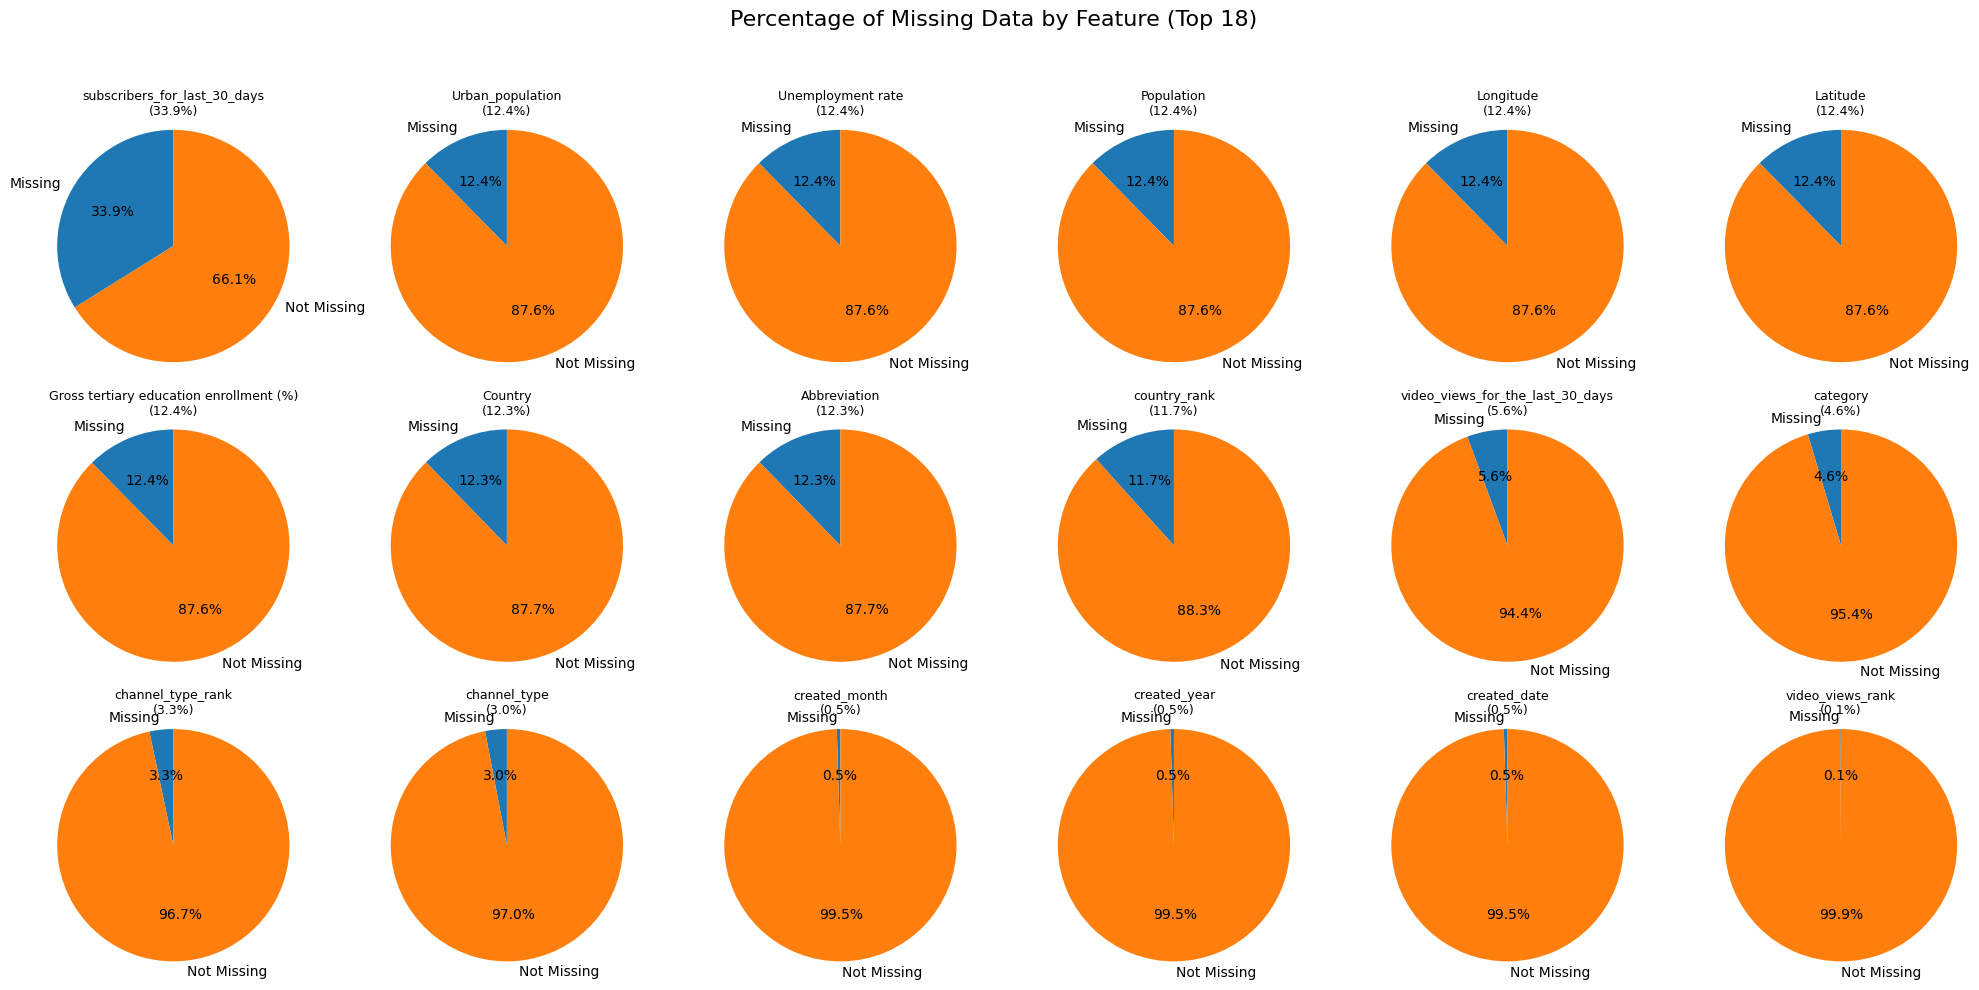

In [12]:
# Set up 6x3 grid for 18 charts
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array for easy iteration

# Loop through the 18 columns
for i, column in enumerate(columns_of_included_missing):
    # Count missing (custom + NaN)
    missing = df_orign[column].isin(custom_missing_values + [np.nan]).sum()
    not_missing = len(df_orign) - missing
    values = [int(missing), int(not_missing)]

    # Pie chart
    axes[i].pie(values, labels=['Missing', 'Not Missing'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{column}\n({missing_df_filtered.iloc[i]['Missing Percentage']:.1f}%)", fontsize=9)
    axes[i].axis('equal')  # Make pie chart circular

# Hide any unused subplots (in case fewer than 18)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Super title and layout adjustment
plt.suptitle('Percentage of Missing Data by Feature (Top 18)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [13]:

print("\n* Original Filtered Data types of each Column:\n\n", df_orign_filtered.dtypes)




* Original Filtered Data types of each Column:

 rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days    

In [14]:
print("\n* Original Filtered Empty Values:\n", df_orign_filtered.isnull().sum())


* Original Filtered Empty Values:
 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month           

## C.2. Standardized column
- Before correlations, convert all features into numerical format

In [15]:
# Copy the Original DataFrame
df_data_analysis = df_orign_filtered.copy()

### C.2.1. [Visualization] 1st Check columns data type


In [16]:
# Function to generate random colors
def generate_random_colors(num_colors):
    return [plt.cm.viridis(np.random.rand()) for _ in range(num_colors)]

In [17]:


def plot_dtype_count(df):
    """
    Create and plot the count of each data type in the given DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame for analysis.
    """
    # Create a DataFrame for plotting
    dtype_df = df.dtypes.reset_index()
    dtype_df.columns = ['Column', 'Data Type']

    # Count occurrences of each data type
    dtype_count = dtype_df['Data Type'].value_counts()



    # Generate random colors
    bar_colors = generate_random_colors(len(dtype_count))

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = dtype_count.plot(kind='bar', color=bar_colors)
    plt.title('Count of Each Data Type in the DataFrame')
    plt.xlabel('Data Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Annotate each bar with its value
    for i in range(len(dtype_count)):
        plt.text(
            i,
            dtype_count.iloc[i] + 0.2,  # Use .iloc to access by position
            str(dtype_count.iloc[i]),   # Use .iloc to access by position
            ha='center',
            va='bottom'
        )

    plt.grid()
    plt.show()


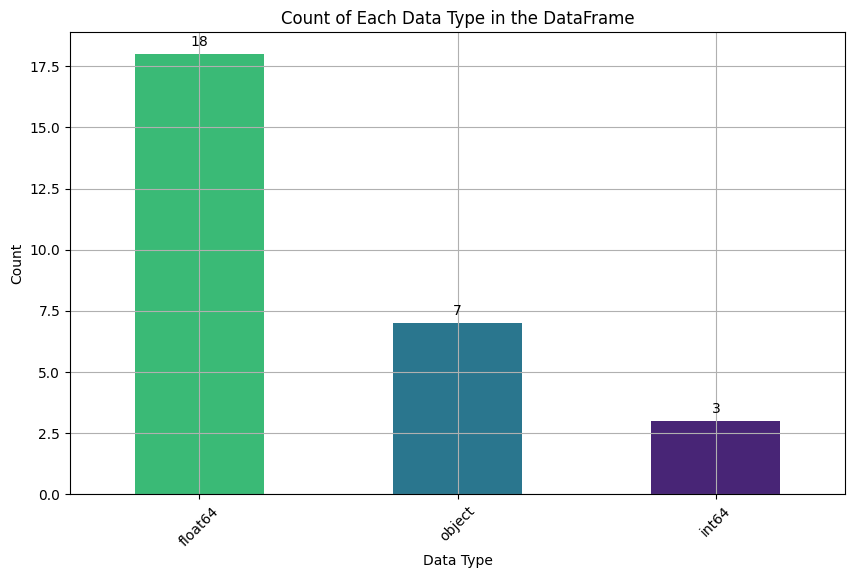

In [18]:
plot_dtype_count(df_data_analysis)

### C.2.2 - Ensure column names are standardized and lowercase

In [19]:
# Ensure column names are standardized and lowercase
df_data_analysis.columns = (
    df_data_analysis.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

# Print column names to check for 'price'
print("Column names after normalization:")
df_data_analysis.columns

Column names after normalization:


Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'gross_tertiary_education_enrollment_(%)', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

### C.2.3. Drop non-useful or high-cardinality columns


**Non-useful or High-cardinality columns in our goals:** <br/>

1. Names or IDs :
`'youtuber', 'title'`

In [20]:
# Drop non-useful or high-cardinality columns (like names or IDs)
df_data_analysis_converted = df_data_analysis.drop(columns=['youtuber', 'title'])


In [21]:
# Print column names to check for 'price'
print("Column names after normalization:")
df_data_analysis_converted.columns

Column names after normalization:


Index(['rank', 'subscribers', 'video_views', 'category', 'uploads', 'country',
       'abbreviation', 'channel_type', 'video_views_rank', 'country_rank',
       'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'created_month',
       'created_date', 'gross_tertiary_education_enrollment_(%)', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

In [22]:
df_data_analysis_converted.describe()

,rank,subscribers,video_views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


### C.2.4. [Visualization] 2nd Check columns data type


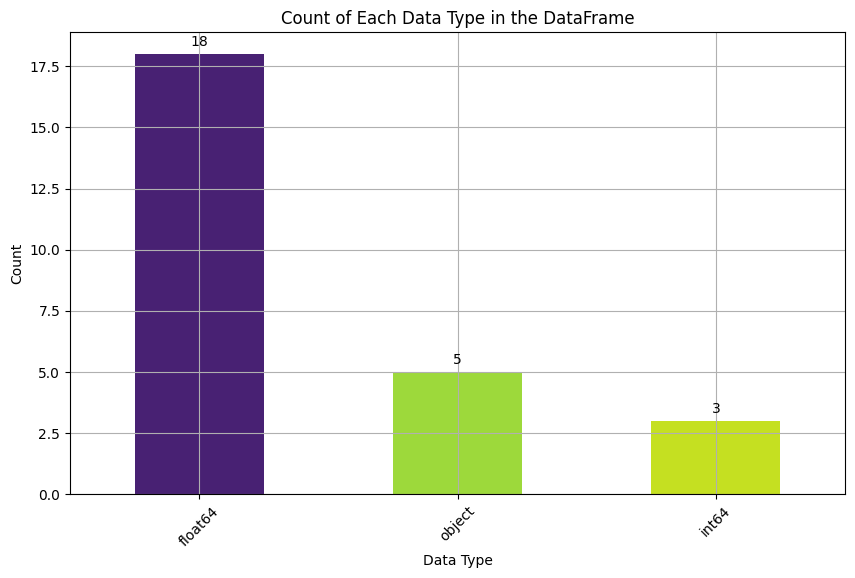

In [23]:
plot_dtype_count(df_data_analysis_converted)

### C.2.5. Label Encode & Save Mappings
- Create Encoded Category Mapping Table

In [24]:
df_current_non_numeric = df_data_analysis_converted.select_dtypes(exclude=['number'])
current_non_numeric_columns = df_current_non_numeric.columns.tolist()
print("Non-numeric columns:")
print(current_non_numeric_columns)



Non-numeric columns:
['category', 'country', 'abbreviation', 'channel_type', 'created_month']


In [25]:

df_current_non_numeric.head()

,category,country,abbreviation,channel_type,created_month
0,Music,India,IN,Music,Mar
1,Film & Animation,United States,US,Games,Mar
2,Entertainment,United States,US,Entertainment,Feb
3,Education,United States,US,Education,Sep
4,Shows,India,IN,Entertainment,Sep


In [26]:
# Initialize dictionary to store mappings
encoding_maps = {}

# Create a copy of the DataFrame to encode
df_data_analysis_ready_to_encoded = df_data_analysis_converted.copy()

# Loop through each column and create mappings
for col in current_non_numeric_columns:
    unique_vals = df_data_analysis_ready_to_encoded[col].dropna().unique()
    mapping_dict = {val: idx for idx, val in enumerate(sorted(unique_vals))}
    encoding_maps[col] = mapping_dict  # Save mapping

    # Apply mapping to the DataFrame
    df_data_analysis_ready_to_encoded[col] = df_data_analysis_ready_to_encoded[col].map(mapping_dict)

# Preview encoded DataFrame
print(df_data_analysis_ready_to_encoded[current_non_numeric_columns].head())


   category  country  abbreviation  channel_type  created_month
0       8.0     18.0          22.0           8.0            7.0
1       4.0     46.0          45.0           6.0            7.0
2       3.0     46.0          45.0           4.0            3.0
3       2.0     46.0          45.0           3.0           11.0
4      14.0     18.0          22.0           4.0           11.0


### *** Encoded Category Mapping Table

In [27]:
# Invert each dictionary: {code: category} instead of {category: code}
inverted_maps = {
    feature: {v: k for k, v in mapping.items()}
    for feature, mapping in encoding_maps.items()
}

# Combine into a DataFrame using pd.DataFrame.from_dict with orient='index', then transpose
encoded_mapping_df = pd.DataFrame.from_dict(inverted_maps, orient='index').transpose()

# Reset index for clarity
encoded_mapping_df.reset_index(inplace=True)
encoded_mapping_df.rename(columns={'index': 'code'}, inplace=True)


# Show the final mapping table
print("Encoded Category Mapping Table:\n")
display(encoded_mapping_df)

Encoded Category Mapping Table:



,code,category,country,abbreviation,channel_type,created_month
0,0,Autos & Vehicles,Afghanistan,AD,Animals,Apr
1,1,Comedy,Andorra,AE,Autos,Aug
2,2,Education,Argentina,AF,Comedy,Dec
3,3,Entertainment,Australia,AR,Education,Feb
4,4,Film & Animation,Bangladesh,AU,Entertainment,Jan
5,5,Gaming,Barbados,BB,Film,Jul
6,6,Howto & Style,Brazil,BD,Games,Jun
7,7,Movies,Canada,BR,Howto,Mar
8,8,Music,Chile,CA,Music,May
9,9,News & Politics,China,CH,News,Nov


In [28]:
df_data_analysis_converted.head()

,rank,subscribers,video_views,category,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude
0,1,245000000,2.280000e+11,Music,20082,India,IN,Music,1.0,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,Film & Animation,1,United States,US,Games,4055159.0,7670.0,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,Entertainment,741,United States,US,Entertainment,48.0,1.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,Education,966,United States,US,Education,2.0,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,Shows,116536,India,IN,Entertainment,3.0,2.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [29]:
df_data_analysis_all_num = df_data_analysis_converted.copy()

# Apply encoding for each feature in the encoding_maps
for feature, mapping in encoding_maps.items():
    if feature in df_data_analysis_all_num.columns:
        df_data_analysis_all_num[feature] = df_data_analysis_all_num[feature].map(mapping)

In [30]:
df_data_analysis_all_num.head()

,rank,subscribers,video_views,category,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude
0,1,245000000,2.280000e+11,8.0,20082,18.0,22.0,8.0,1.0,1.0,...,2000000.0,2006.0,7.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,4.0,1,46.0,45.0,6.0,4055159.0,7670.0,...,NaN,2006.0,7.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,3.0,741,46.0,45.0,4.0,48.0,1.0,...,8000000.0,2012.0,3.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,2.0,966,46.0,45.0,3.0,2.0,2.0,...,1000000.0,2006.0,11.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,14.0,116536,18.0,22.0,4.0,3.0,2.0,...,1000000.0,2006.0,11.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


### C.2.6. [Visualization] 3rd Check columns data type

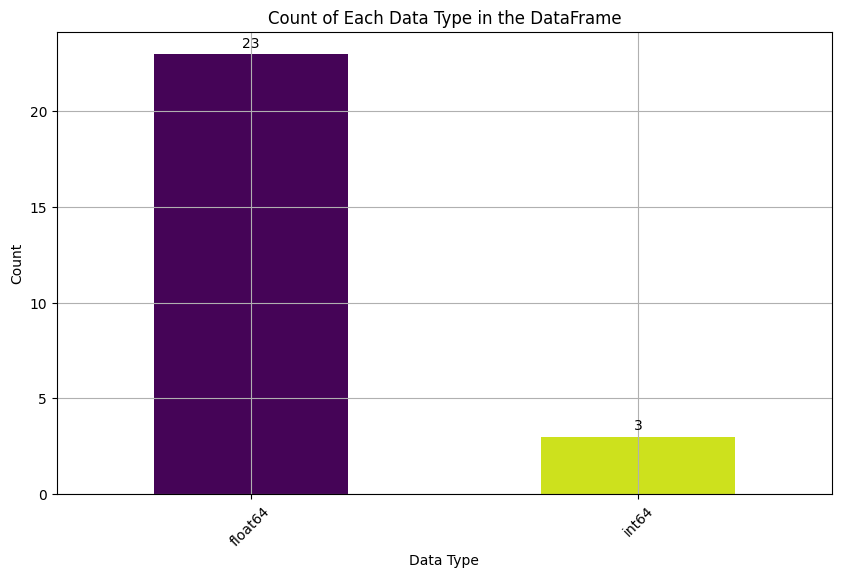

In [31]:
plot_dtype_count(df_data_analysis_all_num)

## C.3. Create new features to support deeper insights

`engagement_rate = video_views / uploads`

`subscriber_growth_rate = subscribers_for_last_30_days / subscribers`

`revenue_per_view = highest_yearly_earnings / video_views`

In [32]:
df_data_analysis_all_num.columns

Index(['rank', 'subscribers', 'video_views', 'category', 'uploads', 'country',
       'abbreviation', 'channel_type', 'video_views_rank', 'country_rank',
       'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'created_month',
       'created_date', 'gross_tertiary_education_enrollment_(%)', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

In [33]:
# Engagement rate: total views per upload
df_data_analysis_all_num['engagement_rate'] = df_data_analysis_all_num['video_views'] / df_data_analysis_all_num['uploads']

# Subscriber growth rate: last 30 days subscriber increase relative to total subscribers
df_data_analysis_all_num['subscriber_growth_rate'] = df_data_analysis_all_num['subscribers_for_last_30_days'] / df_data_analysis_all_num['subscribers']

# Revenue per view: yearly earnings divided by total views
df_data_analysis_all_num['revenue_per_view'] = df_data_analysis_all_num['highest_yearly_earnings'] / df_data_analysis_all_num['video_views']


# Confirm new columns
df_data_analysis_all_num[['engagement_rate', 'subscriber_growth_rate', 'revenue_per_view']].head()

# Replace inf, -inf with np.nan first
df_data_analysis_all_num.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values in engineered columns with 0
df_data_analysis_all_num[['engagement_rate', 'subscriber_growth_rate', 'revenue_per_view']] = \
    df_data_analysis_all_num[['engagement_rate', 'subscriber_growth_rate', 'revenue_per_view']].fillna(0)

# Confirm fix
print("\n Cleaned feature engineering columns:")
print(df_data_analysis_all_num[['engagement_rate', 'subscriber_growth_rate', 'revenue_per_view']].head())


 Cleaned feature engineering columns:
   engagement_rate  subscriber_growth_rate  revenue_per_view
0     1.135345e+07                0.008163          0.000475
1     0.000000e+00                0.000000          0.000000
2     3.828454e+07                0.048193          0.002281
3     1.697723e+08                0.006173          0.000578
4     1.269994e+06                0.006289          0.000591


In [34]:
print(df_data_analysis_all_num[['engagement_rate', 'subscriber_growth_rate', 'revenue_per_view']].describe())

       engagement_rate  subscriber_growth_rate  revenue_per_view
count     9.950000e+02              995.000000        995.000000
mean      4.147036e+08                0.010431          0.000739
std       2.343111e+09                0.021988          0.002344
min       0.000000e+00                0.000000          0.000000
25%       1.890374e+06                0.000000          0.000115
50%       7.051635e+06                0.005263          0.000366
75%       2.613198e+07                0.011252          0.000746
max       3.068634e+10                0.341837          0.047911


### C.3.1. Engagement Rate
How many views a channel gets for each video they post. <br/>
`engagement_rate`

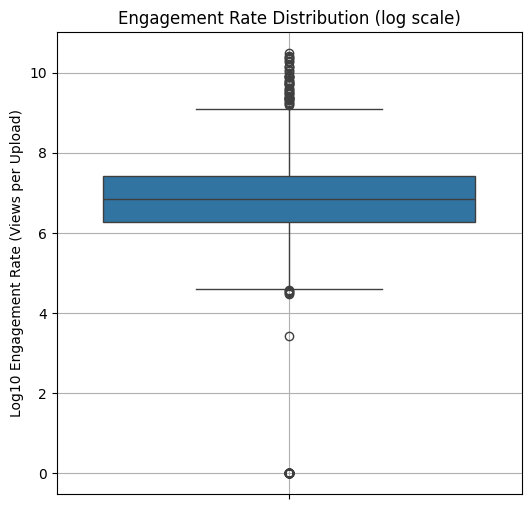

In [35]:
# Boxplot of Engagement Rate (log scale recommended)
plt.figure(figsize=(6, 6))
sns.boxplot(y=np.log10(df_data_analysis_all_num['engagement_rate'] + 1))  # log scale
plt.title('Engagement Rate Distribution (log scale)')
plt.ylabel('Log10 Engagement Rate (Views per Upload)')
plt.grid(True)
plt.show()

### <h3> Insight </h3>
Some creators get millions of views per video, like having a big party and thousands show up. <br/>
But many others get only a few views—like throwing a party and no one comes. <br/>
For businesses, investing in high-engagement creators means more attention per post.

### C.3.2. Subscriber Growth Rate
How fast a channel is gaining new fans. <br/>
`subscribers`

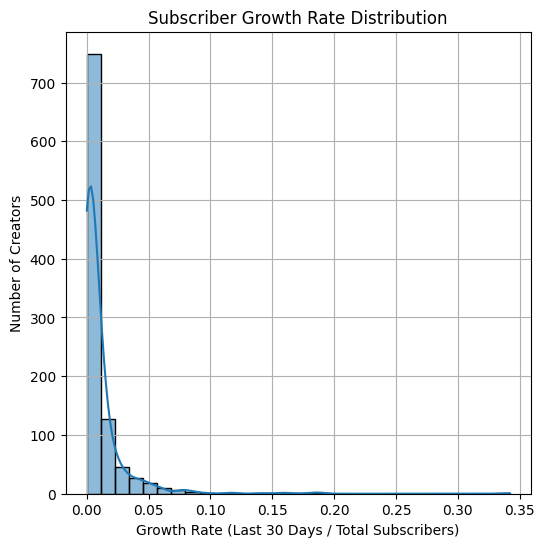

In [36]:
# Histogram of Subscriber Growth Rate
plt.figure(figsize=(6, 6))
sns.histplot(df_data_analysis_all_num['subscriber_growth_rate'], bins=30, kde=True)
plt.title('Subscriber Growth Rate Distribution')
plt.xlabel('Growth Rate (Last 30 Days / Total Subscribers)')
plt.ylabel('Number of Creators')
plt.grid(True)
plt.show()




### <h3> Insight </h3>
Most creators are growing slowly, but a few are growing super fast—like getting 100 new fans every day. <br/>
These fast-growers are like rising stars. <br/>
For brands, it’s smart to work with creators who are on their way up, not stuck or slowing down. <br/>

### C.3.3. Revenue per View
How much money a channel earns for every single view. <br/>
`video_views`

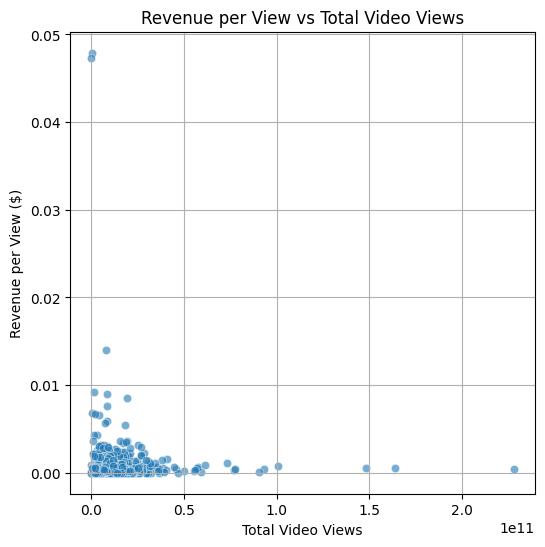

In [37]:
# Scatterplot – Views vs Revenue per View
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='video_views',
    y='revenue_per_view',
    data=df_data_analysis_all_num,
    alpha=0.6
)
plt.title('Revenue per View vs Total Video Views')
plt.xlabel('Total Video Views')
plt.ylabel('Revenue per View ($)')
plt.grid(True)
plt.show()



### <h3> Insight </h3>
Most creators earn very little per view — like getting one cent for every 100 views.<br/>
But a few earn more, like premium channels with smart ads or business deals.<br/>
For investors, those are the high-value creators: they don’t just get views — they make it count.

## C.4. Feature Engineering Summary

In [38]:
df_data_analysis_all_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   subscribers                              995 non-null    int64  
 2   video_views                              995 non-null    float64
 3   category                                 949 non-null    float64
 4   uploads                                  995 non-null    int64  
 5   country                                  873 non-null    float64
 6   abbreviation                             873 non-null    float64
 7   channel_type                             965 non-null    float64
 8   video_views_rank                         994 non-null    float64
 9   country_rank                             879 non-null    float64
 10  channel_type_rank                        962 non-n

In [39]:
df_data_analysis_all_num.describe()

,rank,subscribers,video_views,category,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,...,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude,engagement_rate,subscriber_growth_rate,revenue_per_view
count,995.00000,9.950000e+02,9.950000e+02,949.000000,995.000000,873.000000,873.000000,965.000000,9.940000e+02,879.000000,...,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000,9.950000e+02,995.000000,995.000000
mean,498.00000,2.298241e+07,1.103954e+10,6.087460,9187.125628,31.129439,29.943872,6.242487,5.542489e+05,386.053470,...,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146,4.147036e+08,0.010431,0.000739
std,287.37606,1.752611e+07,1.411084e+10,3.609899,34151.352254,15.190774,14.138091,2.820578,1.362782e+06,1232.244746,...,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809,2.343111e+09,0.021988,0.002344
min,1.00000,1.230000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,...,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629,0.000000e+00,0.000000,0.000000
25%,249.50000,1.450000e+07,4.288145e+09,3.000000,194.500000,18.000000,21.000000,4.000000,3.230000e+02,11.000000,...,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891,1.890374e+06,0.000000,0.000115
50%,498.00000,1.770000e+07,7.760820e+09,5.000000,729.000000,37.000000,31.000000,6.000000,9.155000e+02,51.000000,...,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280,7.051635e+06,0.005263,0.000366
75%,746.50000,2.460000e+07,1.355470e+10,8.000000,2667.500000,46.000000,45.000000,8.000000,3.584500e+03,123.000000,...,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880,2.613198e+07,0.011252,0.000746
max,995.00000,2.450000e+08,2.280000e+11,17.000000,301308.000000,48.000000,48.000000,13.000000,4.057944e+06,7741.000000,...,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924,3.068634e+10,0.341837,0.047911


# D. Exploratory Data Analysis EDA

In [40]:
df_data_analysis_all_num.describe()

,rank,subscribers,video_views,category,uploads,country,abbreviation,channel_type,video_views_rank,country_rank,...,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude,engagement_rate,subscriber_growth_rate,revenue_per_view
count,995.00000,9.950000e+02,9.950000e+02,949.000000,995.000000,873.000000,873.000000,965.000000,9.940000e+02,879.000000,...,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000,9.950000e+02,995.000000,995.000000
mean,498.00000,2.298241e+07,1.103954e+10,6.087460,9187.125628,31.129439,29.943872,6.242487,5.542489e+05,386.053470,...,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146,4.147036e+08,0.010431,0.000739
std,287.37606,1.752611e+07,1.411084e+10,3.609899,34151.352254,15.190774,14.138091,2.820578,1.362782e+06,1232.244746,...,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809,2.343111e+09,0.021988,0.002344
min,1.00000,1.230000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,...,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629,0.000000e+00,0.000000,0.000000
25%,249.50000,1.450000e+07,4.288145e+09,3.000000,194.500000,18.000000,21.000000,4.000000,3.230000e+02,11.000000,...,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891,1.890374e+06,0.000000,0.000115
50%,498.00000,1.770000e+07,7.760820e+09,5.000000,729.000000,37.000000,31.000000,6.000000,9.155000e+02,51.000000,...,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280,7.051635e+06,0.005263,0.000366
75%,746.50000,2.460000e+07,1.355470e+10,8.000000,2667.500000,46.000000,45.000000,8.000000,3.584500e+03,123.000000,...,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880,2.613198e+07,0.011252,0.000746
max,995.00000,2.450000e+08,2.280000e+11,17.000000,301308.000000,48.000000,48.000000,13.000000,4.057944e+06,7741.000000,...,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924,3.068634e+10,0.341837,0.047911


In [41]:
df_data_analysis_all_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   subscribers                              995 non-null    int64  
 2   video_views                              995 non-null    float64
 3   category                                 949 non-null    float64
 4   uploads                                  995 non-null    int64  
 5   country                                  873 non-null    float64
 6   abbreviation                             873 non-null    float64
 7   channel_type                             965 non-null    float64
 8   video_views_rank                         994 non-null    float64
 9   country_rank                             879 non-null    float64
 10  channel_type_rank                        962 non-n


## Q1: Which content categories generate the highest yearly earnings?
To understand which types of content are most profitable on YouTube, we explore total and average yearly earnings across different channel categories. This helps businesses, advertisers, and aspiring creators identify lucrative niches.


In [42]:

# Aggregate yearly earnings by category
category_earnings = df_data_analysis_all_num.groupby("category")[["highest_yearly_earnings"]].sum().sort_values(by="highest_yearly_earnings", ascending=False).dropna()
top_categories = category_earnings.head(10).reset_index()



In [43]:
# Show top 10 categories with total yearly earnings
print("Top 10 Categories by Total Yearly Earnings: \n")
top_categories


Top 10 Categories by Total Yearly Earnings: 



,category,highest_yearly_earnings
0,3.0,1.803635e+09
1,8.0,1.341935e+09
2,11.0,8.657703e+08
3,1.0,5.546650e+08
4,4.0,4.046887e+08
5,2.0,3.745976e+08
6,14.0,3.170000e+08
7,5.0,3.057243e+08
8,9.0,2.004016e+08
9,15.0,1.057663e+08


In [44]:
# Create a dictionary to map category codes to names
category_map = encoded_mapping_df.set_index('code')['category'].to_dict()
# Apply it to your top categories
top_categories['category_name'] = top_categories['category'].map(category_map)


In [45]:
# Bar Chart
fig_bar = go.Figure()
fig_bar.add_trace(go.Bar(
    x=top_categories['category_name'],
    y=top_categories['highest_yearly_earnings'],
    marker_color='indianred'
))
fig_bar.update_layout(
    title="Top 10 YouTube Categories by Total Yearly Earnings",
    xaxis_title="Category",
    yaxis_title="Total Yearly Earnings (USD)",
    template="plotly_white",
    width=900,     # decreased width
    height=600,     # adjust height for balance
        xaxis=dict(
        tickangle=90  # Rotate x-axis labels vertically
    )
)
fig_bar.show()


###<h3> Insight </h3>
<h4> Top Categories by Total Earnings </h4>
The second most lucrative category is said to be entertainment, as it accumulates nearly $1.8 billion USD of earnings per year.<br/>
Other significant categories include Music, People & Blogs, and Comedy, all contributing hundreds of millions in earnings.<br/>
<h5> To be simple:</h5>
They love having fun, such as music and entertainment. It is where you will make the most money from YouTube.
<br/>
<h5> Business takeaway:</h5>
It’s a good idea for a brand to either leverage top creators in Entertainment and Music, so that you get the biggest reach or if you go for the highest ROI.


In [46]:
# Drop rows with missing or zero earnings
df_sunburst = df_data_analysis_all_num[
    df_data_analysis_all_num['category'].isin(top_categories['category'])
].dropna(subset=['category', 'channel_type', 'highest_yearly_earnings'])

df_sunburst = df_sunburst[df_sunburst['highest_yearly_earnings'] > 0]

# Reverse encoding using maps
reverse_maps = {col: {v: k for k, v in mapping.items()} for col, mapping in encoding_maps.items()}

df_sunburst['category'] = df_sunburst['category'].map(reverse_maps['category'])
df_sunburst['channel_type'] = df_sunburst['channel_type'].map(reverse_maps['channel_type'])




In [47]:
# Total earnings by channel_type inside each top category
print("Total Earnings by Channel Type Inside Top Categories: \n")
df_sunburst.groupby(['category', 'channel_type'])['highest_yearly_earnings'].sum().sort_values(ascending=False).head(15)



Total Earnings by Channel Type Inside Top Categories: 



,,highest_yearly_earnings
category,channel_type,
Entertainment,Entertainment,1.560885e+09
Music,Music,1.273313e+09
People & Blogs,People,4.624136e+08
Comedy,Comedy,3.845369e+08
Education,Education,3.476136e+08
Shows,Entertainment,2.607000e+08
Gaming,Games,2.344402e+08
Film & Animation,Entertainment,2.105670e+08
News & Politics,News,1.941008e+08


In [48]:

fig_sunburst = px.sunburst(
    df_sunburst,
    path=['category', 'channel_type'],
    values='highest_yearly_earnings',
    title='Yearly Earnings Distribution by Category and Channel Type',
    color='category'
)
# Customize layout: increase chart size and reduce margins
fig_sunburst.update_layout(
    title_font_size=20,
    width=900,  # Set width
    height=800,  # Set height
    margin=dict(t=50, l=10, r=10, b=10),  # Reduce padding/margins
    uniformtext=dict(minsize=10, mode='hide')  # Hide text if too small
)

fig_sunburst.show()

### <h3> Insight </h3>
<h4> Sunburst – Who Earns Within Each Category? </h4>
The match channel type almost predominates in most of the top categories.<br/>
1. Among those in the Entertainment category, entertainment creators reign supreme.<br/>
2. Music creators lead in Music. Comedy channels lead in Comedy.<br/>
3. Animals, Entertainment, and other sources are also a complementary source of income for People & Blogs.<br/>

<h5> To be simple:</h5>
Among all the categories, the highest is the Music YouTubers. Comedy takes the lead by earning the most in Comedy. <br/>
Staying in your lane means you become rich. <br/>
For this reason, some YouTubers will create a new channel for a new category (Maiorca 2022).<br/>
<br/>
<h5> Business takeaway:</h5>
This clear category-to-type alignment means advertisers should partner with specialized influencers, not just generalists.


### <h3> Bonus Insight </h3>
Same with, Entertainment channel type is seen with Comedy, People & Blogs, Film & Animation, which implies how flexible this is and how a lot it can cover.<br/>

<h5> Business takeaway:</h5>
Entertainment creators offer multi-niche visibility. <br/>
A great example of a flexible influencer where brands could cross-promote across different topics.<br/>

### Q1. Summary and Answer
1. Business Insight: <br/>
Content that entertains is a people pleaser, and the data supports that.  <br/>
YouTube’s music and entertainment channels earn the most of the 70% that make up total earnings on the platform. <br/>

2. Why it matters: <br/>
This is because the categories that have the highest audience appeal and premium ad rates are these categories.  
Therefore, these categories are the most lucrative for content creators and advertisers.

3. Strategic Example: <br/>
Most Music and Comedy Creators who are leading creators tend to focus on their niche to maximize the audience’s loyalty and monetization.
A essay even launches multiple channels to separate different content types (Maiorca 2022).

4. Business Application: <br/>
If you are a brand or an agency, partner with the best creators in these specific categories to tap into a huge audience.
Specialization in a niche for content creators results in 2 things: growth and income potential.




## Q2: How do upload counts relate to subscriber growth in the last 30 days?
We aim to understand whether the number of video uploads contributes to subscriber growth. This can inform content strategy for creators and marketing teams.


In [49]:

# Scatter Plot: Uploads vs. Subscriber Growth Rate
fig_scatter = px.scatter(
    df_data_analysis_all_num,
    x='uploads',
    y='subscriber_growth_rate',
    size='subscribers',
    color='category',
    title='Uploads vs. Subscriber Growth Rate',
    labels={'uploads': 'Total Uploads', 'subscriber_growth_rate': 'Subscriber Growth Rate'},
    template='plotly_white',
    width=900,   # Set width
    height=600   # Set height
)

fig_scatter.show()


### <h3> Insight </h3>
<h4> Scatter Plot – Uploads vs. Subscriber Growth Rate </h4>
This chart shows how the number of videos posted (uploads) relates to how quickly a channel is gaining subscribers:
- Most high-growth channels cluster on the left, with relatively few uploads.
- Heavily active channels with 100K+ uploads tend to have very low growth rates, showing diminishing returns.
- There’s no strong direct pattern — meaning posting more alone isn’t enough.

<h5> To be simple:</h5>
Posting lots of videos won’t magically make people follow you — it helps, but you still need good content.

<h5> Business takeaway:</h5>
Upload volume alone does not predict success. Marketers should consider not just how often creators post, but how <b>engaging and targeted</b> their content is.

In [50]:

# Heatmap: Average Growth Rate Binned by Uploads
# Copy data
df_heat = df_data_analysis_all_num.copy()


In [51]:
uploads_bins = pd.qcut(df_heat['uploads'], q=3, duplicates='drop')
uploads_num_bins = uploads_bins.cat.categories.size

# Print number of bins
print("Number of bins created for uploads_bin:", uploads_num_bins)

Number of bins created for uploads_bin: 3


In [52]:
growth_bins = pd.qcut(df_heat['subscriber_growth_rate'], q=3, duplicates='drop')
growth_num_bins = growth_bins.cat.categories.size

# Print number of bins
print("Number of bins created for growth_bin:", growth_num_bins)

Number of bins created for growth_bin: 2


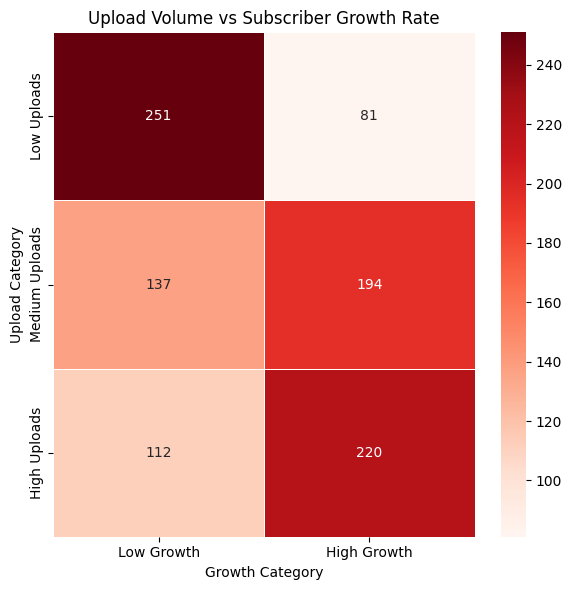

In [53]:

# Quantile binning to create human-readable labels
df_heat['uploads_bin'] = pd.qcut(
    df_heat['uploads'], q=3, labels=['Low Uploads', 'Medium Uploads', 'High Uploads'], duplicates='drop'
)
df_heat['growth_bin'] = pd.qcut(
    df_heat['subscriber_growth_rate'], q=2, labels = ['Low Growth', 'High Growth'], duplicates='drop'
)

# Create pivot table for heatmap
pivot = df_heat.pivot_table(index='uploads_bin', columns='growth_bin', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(pivot, cmap="Reds", linewidths=0.5, annot=True, fmt="d")
plt.title("Upload Volume vs Subscriber Growth Rate")
plt.xlabel("Growth Category")
plt.ylabel("Upload Category")
plt.tight_layout()
plt.show()



### <h3> Insight </h3>
<h4> Heatmap – Upload Volume vs. Subscriber Growth Category </h4>
This heatmap groups YouTube channels by the upload tier and growth tier, and the most populated success zone is “High Upload + High Growth” (220 creators). </br>
There are fewer (only 81), but it's possible to grow fast with fewer uploads (“Low Upload + High Growth”). </br>
194 creators tend to recommend what we term and “Medium Upload + High Growth” sweet spot in consistency and growth.</br>

<h5> To be simple:</h5>
The more videos you upload, the more it helps your chances of getting more fans, but not in an unskilful manner.</br>

<h5> Business takeaway:</h5>
The one sure way to grow the fanbase is with a consistent posting strategy. </br>
In terms of high growth, if you are picking out brands looking for influencers to collaborate with, you should be opting for creators who have a medium to high upload volume, as well as having stable engagement.


### <h3> Bonus Insight </h3>
<h4> Strategic Uploading Beats Volume Alone </h4>
Combining the two charts sheds light on the most important (to my mind) insight. </br>
"Posting more doesn’t work alone."</br>
One can see plenty of high/upload channels with very low growth on the scatter plot. </br>
However, the heatmap shows that regularly posting has a great chance to grow fast, in the mid-range.gularly boosts the odds of fast growth, especially in the mid-range.</br>

<h5> To be simple:</h5>
Post smart, not just a lot.

<h5> Business takeaway:</h5>
Bigger libraries are not everything to grow your business with. </br>
Marketers should be targeting with regular activity and recent growth, not just those with big libraries, which concept supported by digital strategy research (Zhasa 2024).


### Q2. Summary and Answer
1. Business Insight: <br/>
Posting more videos certainly helps in rising your subscriber numbers, but it is not all about the quantity.  <br/>
The real key? Consistency with quality.  <br/>
There is no such thing as successful YouTubers that post once a week, they are doing everything strategically.

2. Real-World Context: <br/>
Generally, the ones who perform well upload fewer posts but deliver content that craves their audience. <br/>
Zhasa (2024) states that blindly pushing content is no longer effective, and we need to do it with ever creating with audience intent, and platform signals in mind. <br/>

3. Data Insight: <br/>
We introduced a new metric in which the analysis was performed. <br/>
`Subscriber Growth Rate = (subscribers gained last 30 days) / total subscribers`  <br/>
We also saw that channels with a consistent and well-contented stream of value, even when uplinks were guided in the direction of interests, saw faster development rates.

4. Business Application: <br/>
For creators: They need to know What audience demand is, and the moethod of building a content calendar based on that for uploads.  <br/>
For brands: Since quite a lot of brands share on Instagram, partner with more of those channels that have a reliable and steady growth trend, instead of focusing on those channels that have a high rate of upload counts.



## Q3: Do countries with higher education levels or urbanization have more successful YouTubers?
To explore socio-economic impact, we analyze if YouTube channels from countries with better education or urban infrastructure show stronger performance metrics like subscriber count.


In [54]:
# Choropleth: Average Subscribers by Country

# mapping table
country_map = encoded_mapping_df.set_index('code')['country'].to_dict()

# Add a new column with decoded country names
df_data_analysis_all_num['country_name'] = df_data_analysis_all_num['country'].map(country_map)



In [55]:

# Group by decoded country name
df_country = df_data_analysis_all_num.groupby('country_name')[['subscribers']].mean().reset_index()

# Create choropleth
fig_choropleth = px.choropleth(
    df_country,
    locations="country_name",
    locationmode="country names",
    color="subscribers",
    color_continuous_scale="Purples",
    title="Average Subscribers by Country",
    width=900,   # Set width
    height=500   # Set height
)
fig_choropleth.show()


### <h3> Insight </h3>
<h4> Boxplot – Education Level vs. Subscribers </h4>
These charts explore whether YouTubers from highly educated countries attract more subscribers:

- The median subscriber count appears highest in the “Very Low” and “Medium” education groups, with no clear upward trend toward “Very High”.

- Extreme outliers (top YouTubers) are found across all education levels, suggesting talent and content may outweigh country-level education.

<h5> To be simple:</h5>
Even if your country has fewer people in university, you can still be a YouTube star.

<h5> Business takeaway:</h5>
Subscriber success does not strongly depend on national education level. Brands and marketers should evaluate creators individually rather than assume advantage based on education infrastructure.

In [56]:

print(df_data_analysis_all_num.columns.tolist())


['rank', 'subscribers', 'video_views', 'category', 'uploads', 'country', 'abbreviation', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_month', 'created_date', 'gross_tertiary_education_enrollment_(%)', 'population', 'unemployment_rate', 'urban_population', 'latitude', 'longitude', 'engagement_rate', 'subscriber_growth_rate', 'revenue_per_view', 'country_name']


In [57]:
# Box plot: Education level vs Subscriber count

# Define custom bin labels
edu_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

In [58]:

# Bin the education data into custom categories
df_data_analysis_all_num['education_enrollment_level'] = pd.cut(
    df_data_analysis_all_num['gross_tertiary_education_enrollment_(%)'],
    bins=5,
    labels=edu_labels,
    include_lowest=True
)

# Create the box plot
fig_box_edu = px.box(
    df_data_analysis_all_num,
    x='education_enrollment_level',
    y='subscribers',
    points="all",
    color_discrete_sequence=['orange'],  # Use orange color
    title="Tertiary Education Level vs. Subscribers",
    labels={
        'education_enrollment_level': 'Education Enrollment Level',
        'subscribers': 'Subscribers'
    },
    template='plotly_white',
    width=700,   # Set width
    height=800,   # Set height
    category_orders={'education_enrollment_level': edu_labels}  # Force correct label order
)

fig_box_edu.show()

In [59]:
# Limit y-axis to focus on data under 50 million
fig_box_edu.update_yaxes(range=[0, 50000000])  # 50M max range

fig_box_edu.show()

### <h3> Insight </h3>
<h4> Choropleth Map – Average Subscribers by Country </h4>
This map shows where top YouTubers get the most fans:

- Countries like Japan, Argentina, the US, and parts of Europe show higher average subscriber counts.

- There is no direct correlation between education level and high-subscriber density.

<h5> To be simple:</h5>
Fans are everywhere! Big YouTubers don’t just come from smart or rich countries.

<h5> Business takeaway:</h5>
YouTube popularity is <b>globally distributed<b/>. Successful creators can emerge from both developed and developing countries. Global marketing strategies should remain open and inclusive.

In [60]:
# Box plot: Urban population vs Subscriber count

# Custom bin labels for urban population
urban_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

In [61]:
# Apply custom bins with ordered labels
df_data_analysis_all_num['urban_population_level'] = pd.cut(
    df_data_analysis_all_num['urban_population'],
    bins=5,
    labels=urban_labels,
    include_lowest=True
)

# Plot with ordered x-axis labels
fig_box_urban = px.box(
    df_data_analysis_all_num,
    x='urban_population_level',
    y='subscribers',
    points="all",
    color_discrete_sequence=['green'],
    title="Urban Population vs. Subscribers",
    labels={
        'urban_population_level': 'Urban Population Level',
        'subscribers': 'Subscribers'
    },
    template='plotly_white',
    width=700,   # Set width
    height=800,   # Set height
    category_orders={'urban_population_level': urban_labels}  # Force correct label order
)


fig_box_urban.show()

In [62]:
# Cap y-axis at 50M for clarity
fig_box_urban.update_yaxes(range=[0, 50000000])

fig_box_urban.show()

### <h3> Insight </h3>
<h4> Boxplot – Urban Population vs. Subscribers </h4>
These charts check if urban infrastructure affects success:

- Subscriber counts are fairly evenly distributed across urbanisation levels.

- Outliers (very large channels) exist in both low and medium urban countries, not just high-density metros.

<h5> To be simple:</h5>
You don’t need to live in a big city to go viral on YouTube.

<h5> Business takeaway:</h5>
Urban population alone is <b>not a strong predictor<b/> of YouTube success. Content creation is accessible even in less urbanised countries — enabling influencer campaigns with wide geographic reach.

### <h3> Bonus Insight </h3>
<h4> Socio-Economic Factors Don’t Define Success </h4>
From all charts, we can see:

- Countries with lower education or urbanisation still produce successful YouTubers.

- Subscriber growth and popularity are more influenced by individual content strategy and platform reach than national infrastructure.

<h5> To be simple:</h5>
YouTube is for everyone — not just people from rich, smart, or big places.

<h5> Business takeaway:</h5>
Creators from underrepresented or emerging regions may offer <b>unique value</b> and audience access. Don’t overlook them based on national stats.

### Q3. Answer
Countries with higher education or urbanisation don’t necessarily have more successful YouTubers. Top channels exist in all regions regardless of infrastructure. YouTube success is driven by individual creativity and global accessibility, not national statistics.




## Q4: Are individual creators growing faster than brand channels?
Understanding which type of YouTube channel—individual or brand—experiences faster growth can inform marketing strategies, sponsorships, and creator development.


- Individual creators are typically independent content producers using personal branding.

- Brand channels are owned by media companies, corporations, or institutions using YouTube as a platform for formal distribution or marketing.

Group the values into:

Individual Creators: "People", "Entertainment", "Education", "Comedy", "Games", "Howto", "Animals"

Brand Channels: "Music", "Film", "Sports", "News", "Tech", "Nonprofit", "Autos"

In [63]:
# Channel type labels from mapping table
channel_map = encoded_mapping_df.set_index('code')['channel_type'].to_dict()
df_data_analysis_all_num['channel_type_label'] = df_data_analysis_all_num['channel_type'].map(channel_map)

# Define groups
individual_types = {"People", "Entertainment", "Education", "Comedy", "Games", "Howto", "Animals"}
brand_types = {"Music", "Film", "Sports", "News", "Tech", "Nonprofit", "Autos"}

# Classify each channel
df_data_analysis_all_num['creator_class'] = df_data_analysis_all_num['channel_type_label'].apply(
    lambda x: 'Individual' if x in individual_types else 'Brand' if x in brand_types else 'Other'
)

# Filter only Individual and Brand
df_valid = df_data_analysis_all_num[df_data_analysis_all_num['creator_class'].isin(['Individual', 'Brand'])]

colors = ['#87a3ec', '#fb5f7a']  # Individual (blue), Brand (red)

legend_labels = [
    'Individual Creators:\nPeople, Entertainment, Education, Comedy, \nGames, Howto, Animals',
    'Brand Channels:\nMusic, Film, Sports, News, Tech, Nonprofit, \nAutos'
]


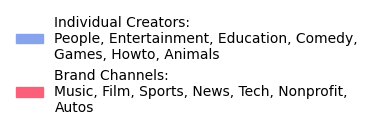

In [64]:
bars = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
plt.figure(figsize=(1, 1))
plt.legend(bars, legend_labels, loc='center', frameon=False)
plt.axis('off')
plt.show()

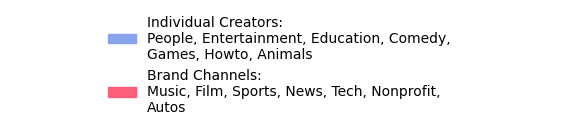

In [65]:
# Boxplot: Subscriber Growth Rate by Creator Type
fig_box_growth = px.box(
    df_valid,
    x='creator_class',
    y='subscriber_growth_rate',
    points='all',
    title='Subscriber Growth Rate by Creator Type',
    labels={
        'subscriber_growth_rate': 'Subscriber Growth Rate (%)',
        'creator_class': 'Creator Type'
    },
    color='creator_class',
    color_discrete_sequence=colors,
    width=562,
    height=800
)
fig_box_growth.update_yaxes(tickformat=".0%", range=[-0.005, 0.1])
fig_box_growth.update_layout(
    xaxis=dict(tickangle=0),
    showlegend=False
)
fig_box_growth.show()

# Add static legend using matplotlib
bars = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
plt.figure(figsize=(7, 1))
plt.legend(bars, legend_labels, loc='center', frameon=False)
plt.axis('off')
plt.show()

### <h3> Insight </h3>
<h4> Subscriber Growth Rate by Creator Type (Boxplot) </h4>
- The boxplot clearly shows that individual creators (red) tend to have a higher median and wider range of subscriber growth compared to brand channels (blue).

- Outliers with extreme growth are mostly individuals, suggesting viral potential is stronger in personal channels.

- Brand channels show consistent but lower growth, with a narrower distribution.

<h5> To be simple:</h5>
Most fast-growing channels are run by real people, not companies. Some personal channels grow super quickly, while brand channels grow slowly and steadily.

<h5> Business takeaway:</h5>
If you're a sponsor or marketing team, targeting <b>individual creators offers more growth potential</b>, especially for reaching viral or niche audiences. But brands are more stable and reliable.

In [66]:
# Bar Chart: Average Subscriber Growth Rate

# Calculate average growth per creator type
avg_growth = df_valid.groupby('creator_class')['subscriber_growth_rate'].mean().reset_index()


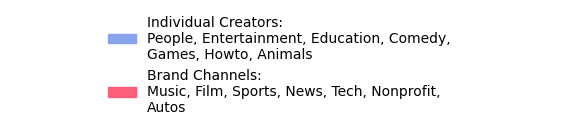

In [67]:
fig_bar_growth = px.bar(
    avg_growth,
    x='creator_class',
    y='subscriber_growth_rate',
    title='Average Subscriber Growth Rate by Creator Type',
    labels={
        'creator_class': 'Creator Type (Individual vs Brand)',
        'subscriber_growth_rate': 'Average Growth Rate (%)'
    },
    color='creator_class',
    color_discrete_sequence=colors,
    width=562,  # Match your boxplot width
    height=600
)

fig_bar_growth.update_yaxes(tickformat=".1%")
fig_bar_growth.update_layout(
    xaxis=dict(tickangle=0),
    showlegend=False
)
fig_bar_growth.show()

# Custom static legend below the chart
bars = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
plt.figure(figsize=(7, 1))  # 7 inches wide = 562px
plt.legend(bars, legend_labels, loc='center', frameon=False)
plt.axis('off')
plt.show()

### <h3> Insight </h3>
<h4> Average Subscriber Growth Rate by Creator Type (Bar Chart) </h4>

- On average, individual creators grow 1.25%, while brands grow around 0.73%.

- That’s ~70% higher average growth for personal creators.

- This metric confirms the trend seen in the boxplot but with a simplified business view.

<h5> To be simple:</h5>
If you follow 100 channels, the people-run ones usually grow faster than the company-run ones.

<h5> Business takeaway:</h5>
When planning ad campaigns or collaborations, creators often deliver <b>faster audience expansion</b>, which may lead to better engagement and ROI.

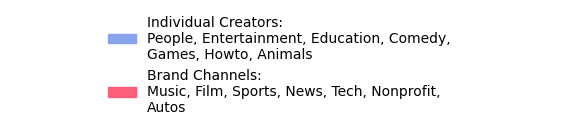

In [68]:
# Boxplot: Highest Yearly Earnings by Creator Type
fig_box_earnings = px.box(
    df_valid,
    x='creator_class',
    y='highest_yearly_earnings',
    points='all',
    title='Highest Yearly Earnings by Creator Type',
    labels={
        'creator_class': 'Creator Type',
        'highest_yearly_earnings': 'Yearly Earnings (USD)'
    },
    color='creator_class',
    color_discrete_sequence=colors,
    width=562,
    height=800
)

fig_box_earnings.update_layout(
    yaxis_tickformat="$.2s",
    xaxis=dict(tickangle=0),
    showlegend=False
)

fig_box_earnings.show()

# Static legend (aligned with box width)
bars = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
plt.figure(figsize=(7, 1))  # 7 inches = 562px
plt.legend(bars, legend_labels, loc='center', frameon=False)
plt.axis('off')
plt.show()

### <h3> Insight </h3>
<h4> Highest Yearly Earnings by Creator Type (Boxplot) </h4>

- While both groups have outliers earning over $100M, the distribution is similar.

- Brand channels are slightly more concentrated around $2–10M.

- Individual creators have more variation, suggesting some breakout success stories but also more unpredictability.

<h5> To be simple:</h5>

Some people earn more than big companies on YouTube—but many also earn less. It’s a bit like winning the lottery if you're really good.

<h5> Business takeaway:</h5>
<b>Individual creators can be high-risk, high-reward.</b> Brands offer safer bets for consistent partnerships, while individuals may offer breakout success if chosen wisely.

### <h3> Q4 Answer </h3>
Q4: Are individual creators growing faster than brand channels?
Yes. All three charts support this:

- Boxplot shows faster and wider growth for individuals.

- Bar chart confirms higher average growth for individuals.

- Earnings data shows individuals can rival or exceed brand earnings, though with more variability.

Together, this suggests that individual creators dominate growth trends, making them ideal for brand partnerships seeking fast traction or viral exposure, while brand channels maintain steady income and reliability.


## Q5: Do older YouTube channels perform better than newer ones?
We explore whether channels created earlier tend to have more subscribers or earnings. This helps understand the long-term value of early platform entry.


In [69]:
df_data_analysis_all_num.columns

Index(['rank', 'subscribers', 'video_views', 'category', 'uploads', 'country',
       'abbreviation', 'channel_type', 'video_views_rank', 'country_rank',
       'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'created_month',
       'created_date', 'gross_tertiary_education_enrollment_(%)', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'engagement_rate', 'subscriber_growth_rate', 'revenue_per_view',
       'country_name', 'education_enrollment_level', 'urban_population_level',
       'channel_type_label', 'creator_class'],
      dtype='object')

In [70]:
# Scatter plot: Created Year vs Subscribers
fig_scatter_year = px.scatter(
    df_data_analysis_all_num,
    x='created_year',
    y='subscribers',
    color='category',
    size='video_views',
    title='Subscribers vs. Created Year',
    labels={'created_year': 'Channel Created Year', 'subscribers': 'Subscribers'},
    template='plotly_white',
    width=800,
    height=600
)
fig_scatter_year.show()


### <h3> Insight </h3>
<h4> Average Yearly Earnings by Channel Creation Year and Month </h4>
This heatmap analyzes how the average yearly earnings vary based on when a channel was created—both year and month. It shows:

- Channels created between 2006–2016 dominate in high earnings.

- Some of the highest averages appeared in 2007, 2011, and 2016, suggesting first-mover advantage.

- Channels created after 2020 show much lower earnings overall, even though some months like Feb–Apr 2020 had spikes.

- Certain creation months, especially March and November, appear more profitable across several years.

<h5> To be simple: </h5>
Old channels earn more money. If you started early, you had more time to grow and make money. But if you just joined recently, it's harder.

<h5> Business takeaway: </h5>
For brands and creators, early adoption of new platforms gives a <b>competitive edge</b>. Marketers might prioritize <b>established creators</b> for campaigns, while newer channels may need <b>more aggressive growth strategies</b> or niche targeting.

In [71]:
# Cap x-axis for clarity
fig_scatter_year.update_xaxes(range=[2003, 2023])

fig_scatter_year.show()

In [72]:
# Heatmap: Created Year and Month vs Average Earnings
# 1. Prepare the pivot table
df_time = df_data_analysis_all_num[['created_year', 'created_month', 'highest_yearly_earnings']].dropna()
df_time['created_month'] = pd.to_numeric(df_time['created_month'], errors='coerce')

# 2. Create pivot table
pivot_time = df_time.pivot_table(
    index='created_year',
    columns='created_month',
    values='highest_yearly_earnings',
    aggfunc='mean'
)

# 3. Map encoded month index to actual month name using your encoded_mapping_df
month_mapping = encoded_mapping_df.set_index('code')['created_month'].to_dict()
month_labels = [month_mapping.get(int(col), "") for col in pivot_time.columns]

# 4. Format cell annotations
def format_earnings(val):
    if pd.isna(val) or val == 0:
        return ""
    elif abs(val) >= 1e6:
        return f"${val/1e6:.1f}M"
    elif abs(val) >= 1e3:
        return f"${val/1e3:.0f}K"
    else:
        return f"${val:.0f}"

annot_labels = pivot_time.applymap(format_earnings)



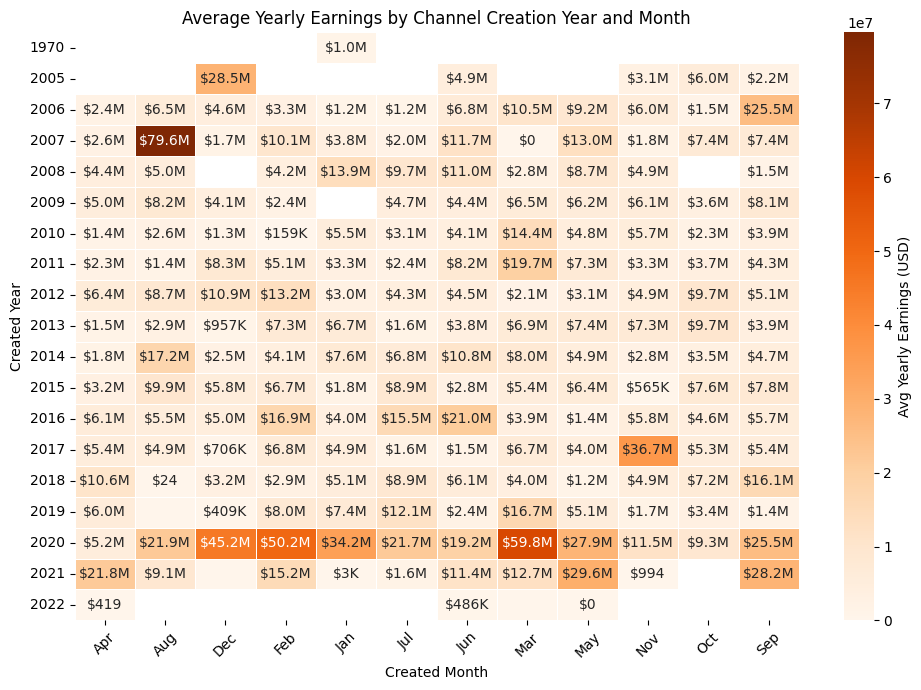

In [73]:
# 5. Plot
plt.figure(figsize=(10, 7))
sns.heatmap(
    pivot_time,
    cmap='Oranges',
    annot=annot_labels,
    fmt="",
    linewidths=0.5,
    cbar_kws={'label': 'Avg Yearly Earnings (USD)'}
)
plt.title("Average Yearly Earnings by Channel Creation Year and Month")
plt.xlabel("Created Month")
plt.ylabel("Created Year")

# Set x-axis (months)
plt.xticks(ticks=np.arange(len(month_labels)) + 0.5, labels=month_labels, rotation=45)

# Set y-axis (years as integers)
plt.yticks(ticks=np.arange(len(pivot_time.index)) + 0.5, labels=pivot_time.index.astype(int), rotation=0)

plt.tight_layout()
plt.show()


### <h3> Insight </h3>

<h4> Subscribers vs. Created Year </h4>
This bubble chart shows how the number of subscribers relates to when a channel was started. Size = subscribers, color = category.

- Older channels (created around 2005–2015) have a much larger subscriber base.

- Many newer channels (after 2018) exist but mostly cluster at lower subscriber levels.

- A few exceptional newer channels reached high subscriber counts, but these are rare outliers.

- Most top-performing channels were started before 2017, and had time to accumulate loyal followers.

<h5> To be simple: </h5>
Older channels have had more time to get followers, so they’re bigger now. New channels are still trying to catch up.

<h5> Business takeaway: </h5>
<b>Longevity matters.</b> YouTube rewards consistent presence over time. Investors and marketers should evaluate not just current size, but <b>channel age and growth momentum</b>. New channels should track growth rate and engagement to stay competitive.

### <h3> Q5 Answer </h3>
Do older YouTube channels perform better than newer ones?


Yes—older YouTube channels generally perform better than newer ones in both earnings and subscriber count. While some new channels grow fast, the data supports a clear long-term advantage for early creators. This insight supports strategic partnerships with established channels and encourages early adoption of new media platforms.



# E. Conclusion

<h2> Conclusion </h2>

- Success on YouTube is influenced by strategy, creativity, and

consistency, not geography, education, or wealth.

- Content categories like Music and Entertainment yield the highest earnings.

- Growth is driven by high engagement, smart content planning, and a strong personal brand.

- Individual creators are surpassing brands, making them ideal for partnerships and viral reach.

- Older channels have growth advantages, but new creators can succeed by focusing on quality content in a niche.

- Frequent uploads are beneficial only when combined with consistent value and audience engagement.

<h2> Recommendations for New Creators:</h2>

- Track growth and engagement from the start.

- Focus on a niche and post consistently.

- Prioritize quality over quantity.

- Build a personal brand that connects with audiences.

<h2>  For Businesses: </h2>
Target high-growth, high-engagement creators, as YouTube success is driven by passion and connection, not demographics.

# Appendices:
1. Maiorca, D 2022, Should you have multiple YouTube channels? The pros and cons, MakeUseOf, 10 June, viewed 8 April 2025, https://www.makeuseof.com/having-multiple-youtube-channels-pros-cons/.
2. Zhasa, M 2024, 8 ways to get more subscribers on YouTube in 2025, Simplilearn, 14 November, viewed 8 April 2025, https://www.simplilearn.com/how-to-increase-youtube-subscribers-article.

# THE END